In [1]:
import proteusAI as pai
import pandas as pd

/home/mathildedue/miniforge3/envs/proteusAI/lib/python3.8/site-packages/proteusAI/ml_tools/esm_tools/esm_tools.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alphabet 

In [3]:
# Load the library data pae
library_pae = pai.Library(source='demo/demo_data/master_dataset.csv', seqs_col='binder_seq', y_col='pae_interaction_HLA-A101-RVTDESILSY', 
                    y_type='num', names_col='binder_name')
# Load the library data plddt
library_plddt = pai.Library(source='demo/demo_data/master_dataset.csv', seqs_col='binder_seq', y_col='plddt_binder_HLA-A101-RVTDESILSY', 
                    y_type='num', names_col='binder_name')

In [4]:
# Load the model for pae and plddt
model_pae = pai.Model(library=library_pae)
plddt_model = pai.Model(library=library_plddt)

In [6]:
# Train the model for pae
_ = model_pae.train(k_folds=5, model_type='rf', x='blosum62', seed=42, split=(60,20,20))

Training completed:
val_r2:	-0.5559797523657672


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Predicted vs. True y-values'}, xlabel='y', ylabel='predicted y'>)

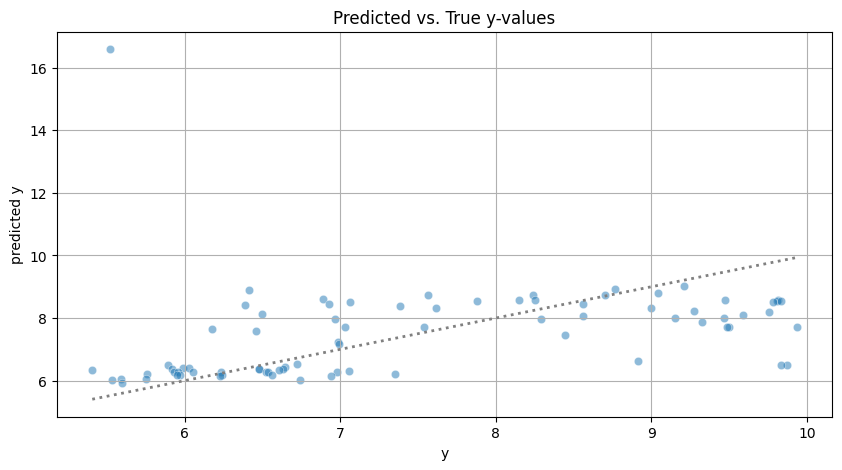

In [7]:
# 
model_pae.true_vs_predicted(y_true=model_pae.y_val, y_pred=model_pae.y_val_pred)

In [8]:
train_names = [prot.name for prot in model_pae.train_data]
test_names = [prot.name for prot in model_pae.test_data]
val_names = [prot.name for prot in model_pae.val_data]

In [9]:
train = [prot for prot in plddt_model.library.proteins if prot.name in train_names]
test = [prot for prot in plddt_model.library.proteins if prot.name in test_names]
val = [prot for prot in plddt_model.library.proteins if prot.name in val_names]

split = {'train':train, 'test':test, 'val':val}

# Train the model for plddt
plddt_train = plddt_model.train(k_folds=5, model_type='rf', x='blosum62', seed=42, split=split)

Training completed:
val_r2:	0.3122442796545283


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Predicted vs. True y-values'}, xlabel='y', ylabel='predicted y'>)

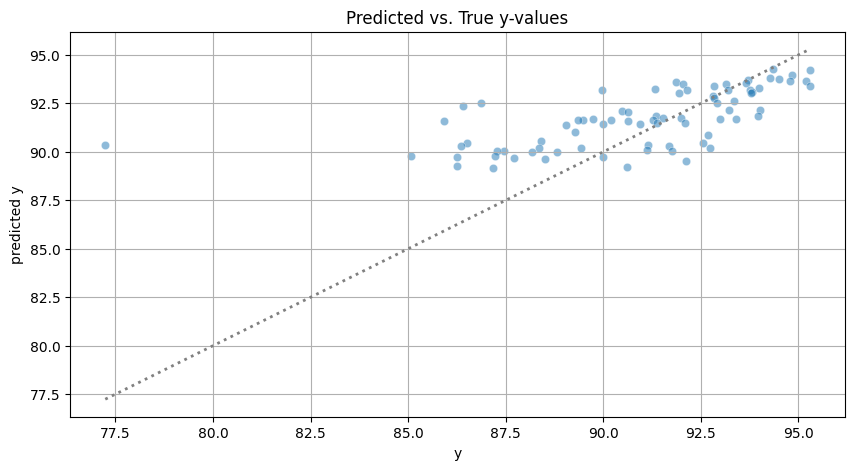

In [10]:
plddt_model.true_vs_predicted(y_true=plddt_model.y_val, y_pred=plddt_model.y_val_pred)

In [ ]:
pae_out = model_pae.search(optim_problem='min', overwrite = True) # acq_fn = 'ei'#, overwrite=True

plddt_out = plddt_model.search(optim_problem='max', overwrite = True) # acq_fn = 'ei'#overwrite=True

IndexError: string index out of range

In [29]:
predicted_proteins = [pai.Protein(seq=row.sequence, name=row['name']) for i, row in pae_out.iterrows()]
plddt_predictions = plddt_model.predict(predicted_proteins)

In [30]:
for prot in plddt_predictions[0]:
    print(prot)
    predicted_plddt_value = prot.y_pred
    predicted_plddt_sigma = prot.y_sigma
    print(predicted_plddt_value, predicted_plddt_sigma)
    break

proteusAI.Protein():
____________________
name	: binder_1+M17Y
seq	: EEEEKFKKELEETRKRYLEEARELTARAVEALRAGEELLAQALSNAAGILMTVVSLADNLLLGDLKGAEINLESMEKLYEILKETAEQLKAKHPEYAPEVEELLKLAEEALKEAKKLLEKAKKL
rep	: []
y:	None
y_pred:	94.969874
y_sig:	0.6767911521466585
struc:	None

94.969874 0.6767911521466585


In [31]:
out_pae = pae_out.sort_values(by=['y_predicted'], ascending=True)
out_pae.to_csv('demo/demo_data/predictions_pae.csv')

In [32]:
out_plddt = plddt_out.sort_values(by=['y_predicted'], ascending=False)
out_plddt.to_csv('demo/demo_data/predictions_plddt.csv')

array([[<Axes: title={'center': 'y_predicted'}>,
        <Axes: title={'center': 'y_sigma'}>],
       [<Axes: title={'center': 'acq_score'}>, <Axes: >]], dtype=object)

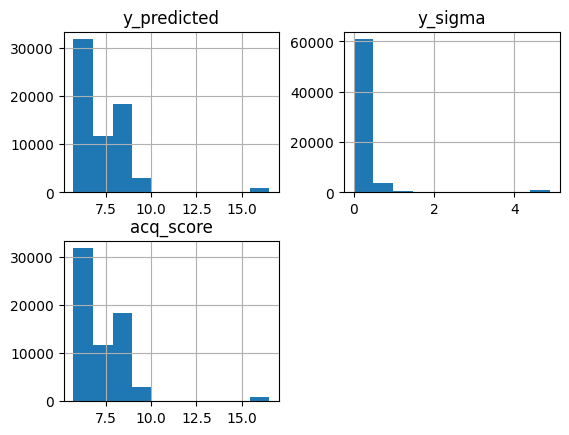

In [33]:
out_pae.hist()

array([[<Axes: title={'center': 'y_predicted'}>,
        <Axes: title={'center': 'y_sigma'}>],
       [<Axes: title={'center': 'acq_score'}>, <Axes: >]], dtype=object)

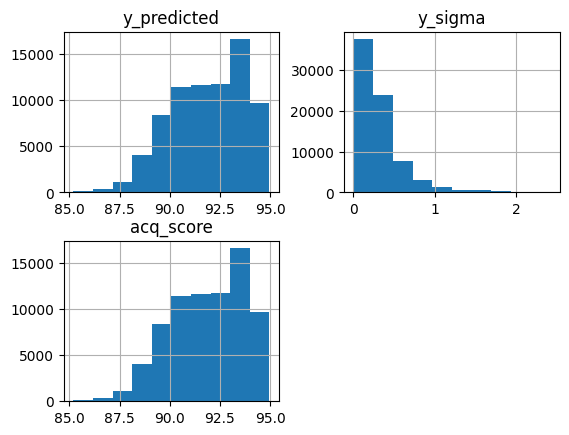

In [34]:
out_plddt.hist()